In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Exercise 2

In [2]:
df_alleles = pd.read_csv("/Users/cmdb/qbb2020-answers/day2-homework/matrix_1kg.txt",
                        sep='\t')
df_alleles #allele presence for SNPs

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_alleles_only = df_alleles.iloc[:,4:]
df_alleles_only

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_alleles_only['Total'] = df_alleles_only.sum(axis = 1) #add a total column and sum all rows
df_alleles_only

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144,Total
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,98
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,105
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,7
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,147


In [15]:
df_alleles_only['Frequency'] = (df_alleles_only.iloc[:,-1])/5096 
#add frequency column that does total allele divided by total columns*2
df_alleles_only

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144,Total,Frequency
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0.000392
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,98,0.019231
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,17,0.003336
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,0.002159
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0.000392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,105,0.020604
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.000196
9997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,7,0.001374
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,147,0.028846


In [23]:
df_frequency = df_alleles_only.iloc[:,-1]
df_frequency

0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Name: Frequency, Length: 10000, dtype: float64

In [24]:
df_frequency.shape

(10000,)

In [140]:
#convert array to list
import numpy as np
frequency = df_frequency.to_list()

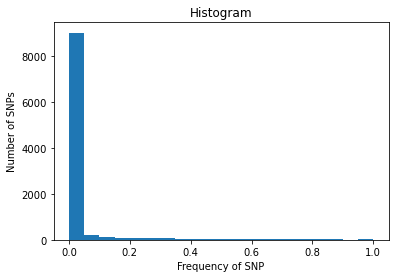

In [115]:
data = frequency
plt.hist(data, bins=20)
plt.ylabel('Number of SNPs')
plt.xlabel('Frequency of SNP')
plt.title('Histogram')
plt.show()

In [44]:
#added POS back because didn't know if would be needed
df_alleles_only['POS']=df_alleles['POS']
df_alleles_only

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144,Total,Frequency,POS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0.000392,14347281
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,98,0.019231,14003813
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,17,0.003336,39261634
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,11,0.002159,17793478
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0.000392,35934376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,105,0.020604,28142462
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.000196,17061272
9997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,7,0.001374,43768467
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,147,0.028846,36334991


# Exercise 3

In [52]:
common_variation = df_alleles_only[(df_alleles_only.iloc[:,-2] > 0.05)
                                  & (df_alleles_only.iloc[:,-2] < 0.95)]
                    #subset data frame to common variation
common_variation

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144,Total,Frequency,POS
20,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,409,0.080259,26683267
32,1,2,1,1,1,1,0,0,0,1,...,0,0,0,1,1,1,0,3036,0.595761,37584553
38,0,1,2,1,1,1,1,1,1,0,...,1,1,1,1,2,0,1,2067,0.405612,34522570
41,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,481,0.094388,41704121
46,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,497,0.097527,29502200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,1,2,2,2,2,2,1,2,2,1,...,2,2,2,2,2,1,2,4290,0.841837,40748951
9959,1,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,591,0.115973,42683839
9974,0,1,1,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,921,0.180730,38472865
9975,2,1,0,1,0,1,0,1,2,2,...,2,2,1,2,2,2,2,4128,0.810047,43359202


# Exercise 4

In [53]:
pca_input = common_variation.iloc[:,:-3] #all rows, columns stop before total
pca_input

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32,1,2,1,1,1,1,0,0,0,1,...,1,1,2,0,0,0,1,1,1,0
38,0,1,2,1,1,1,1,1,1,0,...,0,1,0,1,1,1,1,2,0,1
41,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,1,2,2,2,2,2,1,2,2,1,...,2,2,2,2,2,2,2,2,1,2
9959,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9974,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
9975,2,1,0,1,0,1,0,1,2,2,...,1,2,2,2,2,1,2,2,2,2


In [54]:
pca_input = pca_input.T #transpose so samples in rows, allele in column
pca_input 

,20,32,38,41,46,54,66,77,93,98,...,9894,9904,9913,9927,9929,9957,9959,9974,9975,9980
HG00096,0,1,0,0,0,0,0,1,0,2,...,0,0,0,0,2,1,1,0,2,0
HG00097,1,2,1,1,0,1,0,0,0,1,...,0,0,0,1,0,2,0,1,1,0
HG00099,1,1,2,0,0,1,0,1,0,2,...,0,1,1,0,1,2,1,1,0,0
HG00100,1,1,1,0,0,1,0,0,0,0,...,0,0,1,0,1,2,0,0,1,0
HG00101,0,1,1,0,0,2,1,0,0,0,...,0,0,1,0,2,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,0,1,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,1,1,0
NA21141,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,2,2,0,1,2,0
NA21142,0,1,2,0,0,0,0,0,0,2,...,0,0,1,1,0,2,0,0,2,0
NA21143,0,1,0,0,0,2,1,1,0,0,...,0,1,0,1,1,1,0,0,2,0


In [106]:
pca_input.index #this index will be used later for merging

Index(['HG00096', 'HG00097', 'HG00099', 'HG00100', 'HG00101', 'HG00102',
       'HG00103', 'HG00104', 'HG00105', 'HG00106',
       ...
       'NA21128', 'NA21129', 'NA21130', 'NA21133', 'NA21135', 'NA21137',
       'NA21141', 'NA21142', 'NA21143', 'NA21144'],
      dtype='object', length=2548)

In [55]:
pca_input.mean(axis = 0) #calculate means

20      0.160518
32      1.191523
38      0.811224
41      0.188776
46      0.195055
          ...   
9957    1.683673
9959    0.231947
9974    0.361460
9975    1.620094
9980    0.155416
Length: 986, dtype: float64

In [56]:
pca_input.var(axis = 0) #calculate variance

20      0.150510
32      0.504333
38      0.525402
41      0.193247
46      0.187694
          ...   
9957    0.287020
9959    0.213553
9974    0.320414
9975    0.349529
9980    0.180783
Length: 986, dtype: float64

In [141]:
#standardize so that mean expression is 0 and variance is 1
pca_input_standardized = StandardScaler().fit_transform(pca_input)
#pca_input_standardized.mean(axis = 0) #check that mean is 0

In [142]:
#pca_input_standardized.var(axis = 0) #check that variance is 1

In [60]:
pca = PCA(n_components=10)
    #10 principle components
pca_output = pca.fit_transform(pca_input_standardized)
    #pca_input_standardized is the df we are passing through
pca_output
    #output is numpy array that contains PCA values

array([[-6.14493037, -9.81856679, -1.54531243, ..., -1.06679213,
         1.83935332, -4.45398399],
       [-6.13388414, -8.63182899,  2.55599691, ...,  5.44350693,
        -2.86537025, -1.59366941],
       [-6.23847319, -7.97186993, -0.74599185, ..., -1.78720086,
         0.66823902,  0.61411722],
       ...,
       [-4.09694721, -2.82736165, -4.17869214, ...,  0.13709957,
        -1.12715239,  4.78222579],
       [-6.26346243, -2.58507985, -4.22688919, ..., -0.22949521,
        -1.05079115,  1.95419013],
       [-3.17677867, -0.91694962, -6.45103261, ...,  3.87201894,
        -1.78147638,  1.79380929]])

In [61]:
pca_output.shape #10 for the 10 principle components

(2548, 10)

In [62]:
#create df for pca_output
pca_output_df = pd.DataFrame(data = pca_output,
                            columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
                            )
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-6.144930,-9.818567,-1.545312,-5.400497,-0.527892,-0.316934,1.044755,-1.066792,1.839353,-4.453984
1,-6.133884,-8.631829,2.555997,-3.895055,0.312010,-2.364545,0.839791,5.443507,-2.865370,-1.593669
2,-6.238473,-7.971870,-0.745992,-4.011336,-0.924301,4.043621,0.152138,-1.787201,0.668239,0.614117
3,-5.051218,-7.008727,2.804368,-4.759824,4.380208,0.309704,-0.440926,-1.544853,0.677943,0.825105
4,-6.634383,-8.543670,3.071782,-1.592116,-4.356704,0.726356,1.315322,-3.590142,-0.106589,1.949068
...,...,...,...,...,...,...,...,...,...,...
2543,-6.304582,-0.169819,-2.664411,3.295729,-0.211566,-0.822929,-3.020945,-1.369849,-0.847629,0.558414
2544,-6.295888,-3.116491,-5.555616,3.335503,3.332726,3.642265,-0.793302,-4.334416,-2.252084,-0.585865
2545,-4.096947,-2.827362,-4.178692,3.691470,1.531408,0.323671,-1.105135,0.137100,-1.127152,4.782226
2546,-6.263462,-2.585080,-4.226889,3.894361,-3.929928,-1.829753,-0.629755,-0.229495,-1.050791,1.954190


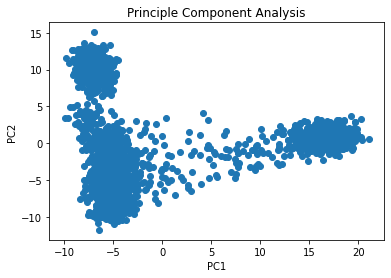

In [105]:
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])
ax.set_title('Principle Component Analysis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()

## Advanced exercises

# Exercise 6

In [64]:
#read metadata file
df_metadata = pd.read_csv('integrated_call_samples_v3.20130502.ALL.panel',sep='\t')
df_metadata

,sample,pop,super_pop,gender,Unnamed: 4,Unnamed: 5
0,HG00096,GBR,EUR,male,NaN,NaN
1,HG00097,GBR,EUR,female,NaN,NaN
2,HG00099,GBR,EUR,female,NaN,NaN
3,HG00100,GBR,EUR,female,NaN,NaN
4,HG00101,GBR,EUR,male,NaN,NaN
...,...,...,...,...,...,...
2499,NA21137,GIH,SAS,female,NaN,NaN
2500,NA21141,GIH,SAS,female,NaN,NaN
2501,NA21142,GIH,SAS,female,NaN,NaN
2502,NA21143,GIH,SAS,female,NaN,NaN


In [66]:
#select columns we want to use for grouping
df_metadata = df_metadata[["sample","pop","super_pop","gender"]]
df_metadata

,sample,pop,super_pop,gender
0,HG00096,GBR,EUR,male
1,HG00097,GBR,EUR,female
2,HG00099,GBR,EUR,female
3,HG00100,GBR,EUR,female
4,HG00101,GBR,EUR,male
...,...,...,...,...
2499,NA21137,GIH,SAS,female
2500,NA21141,GIH,SAS,female
2501,NA21142,GIH,SAS,female
2502,NA21143,GIH,SAS,female


In [67]:
#add 'sample' column with values from pca_input
pca_output_df['sample'] = pca_input.index 

In [68]:
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,sample
0,-6.144930,-9.818567,-1.545312,-5.400497,-0.527892,-0.316934,1.044755,-1.066792,1.839353,-4.453984,HG00096
1,-6.133884,-8.631829,2.555997,-3.895055,0.312010,-2.364545,0.839791,5.443507,-2.865370,-1.593669,HG00097
2,-6.238473,-7.971870,-0.745992,-4.011336,-0.924301,4.043621,0.152138,-1.787201,0.668239,0.614117,HG00099
3,-5.051218,-7.008727,2.804368,-4.759824,4.380208,0.309704,-0.440926,-1.544853,0.677943,0.825105,HG00100
4,-6.634383,-8.543670,3.071782,-1.592116,-4.356704,0.726356,1.315322,-3.590142,-0.106589,1.949068,HG00101
...,...,...,...,...,...,...,...,...,...,...,...
2543,-6.304582,-0.169819,-2.664411,3.295729,-0.211566,-0.822929,-3.020945,-1.369849,-0.847629,0.558414,NA21137
2544,-6.295888,-3.116491,-5.555616,3.335503,3.332726,3.642265,-0.793302,-4.334416,-2.252084,-0.585865,NA21141
2545,-4.096947,-2.827362,-4.178692,3.691470,1.531408,0.323671,-1.105135,0.137100,-1.127152,4.782226,NA21142
2546,-6.263462,-2.585080,-4.226889,3.894361,-3.929928,-1.829753,-0.629755,-0.229495,-1.050791,1.954190,NA21143


In [69]:
#merge shared columns
pca_output_df = pd.merge(pca_output_df, df_metadata, on = 'sample')
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,sample,pop,super_pop,gender
0,-6.144930,-9.818567,-1.545312,-5.400497,-0.527892,-0.316934,1.044755,-1.066792,1.839353,-4.453984,HG00096,GBR,EUR,male
1,-6.133884,-8.631829,2.555997,-3.895055,0.312010,-2.364545,0.839791,5.443507,-2.865370,-1.593669,HG00097,GBR,EUR,female
2,-6.238473,-7.971870,-0.745992,-4.011336,-0.924301,4.043621,0.152138,-1.787201,0.668239,0.614117,HG00099,GBR,EUR,female
3,-5.051218,-7.008727,2.804368,-4.759824,4.380208,0.309704,-0.440926,-1.544853,0.677943,0.825105,HG00100,GBR,EUR,female
4,-6.634383,-8.543670,3.071782,-1.592116,-4.356704,0.726356,1.315322,-3.590142,-0.106589,1.949068,HG00101,GBR,EUR,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,-6.304582,-0.169819,-2.664411,3.295729,-0.211566,-0.822929,-3.020945,-1.369849,-0.847629,0.558414,NA21137,GIH,SAS,female
2499,-6.295888,-3.116491,-5.555616,3.335503,3.332726,3.642265,-0.793302,-4.334416,-2.252084,-0.585865,NA21141,GIH,SAS,female
2500,-4.096947,-2.827362,-4.178692,3.691470,1.531408,0.323671,-1.105135,0.137100,-1.127152,4.782226,NA21142,GIH,SAS,female
2501,-6.263462,-2.585080,-4.226889,3.894361,-3.929928,-1.829753,-0.629755,-0.229495,-1.050791,1.954190,NA21143,GIH,SAS,female


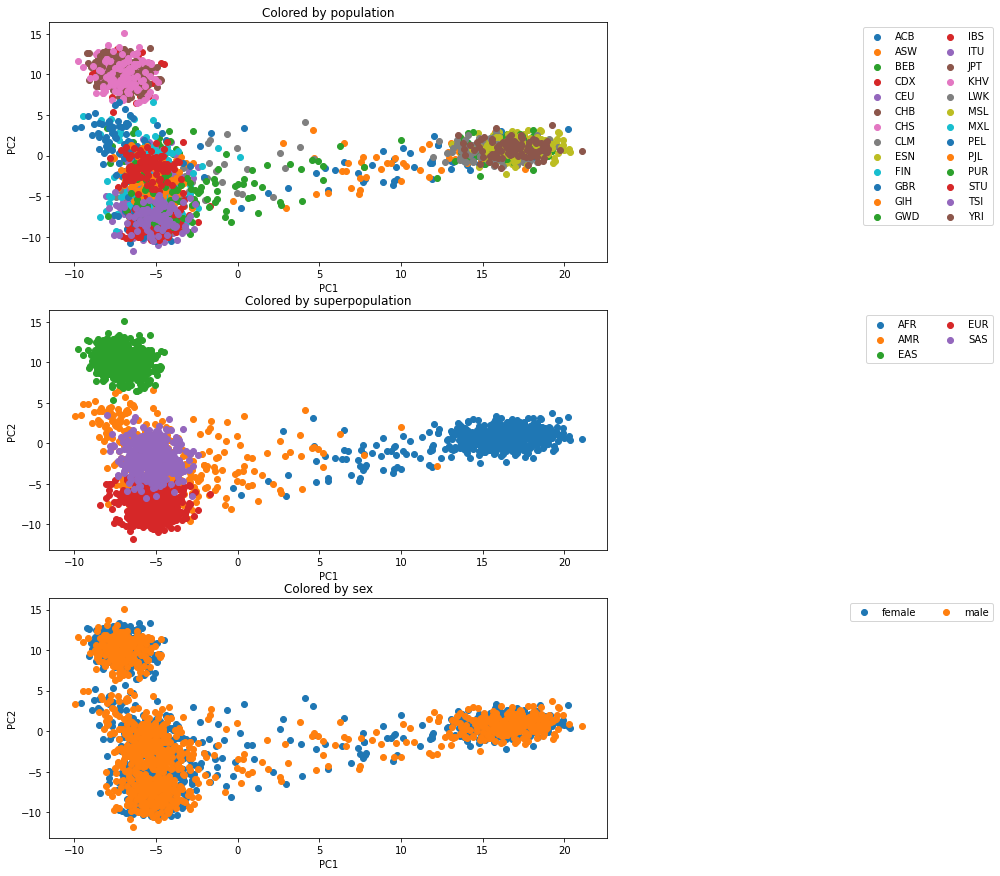

In [103]:
#color PCA by population
population = pca_output_df.groupby("pop")
#color PCA by superpopulation
superpopulation = pca_output_df.groupby("super_pop")
#color PCA by sex
gender = pca_output_df.groupby("gender")

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,15))

for name, group in population:
    ax1.scatter(x = group['PC1'], y = group['PC2'], label = name)
    ax1.legend(bbox_to_anchor = (1.7,1), loc = 'upper right', ncol = 2)
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_title('Colored by population')
    
for name, group in superpopulation:
    ax2.scatter(x = group['PC1'], y = group['PC2'], label = name)
    ax2.legend(bbox_to_anchor = (1.7,1), loc = 'upper right', ncol = 2)
    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC2')
    ax2.set_title('Colored by superpopulation')
    
for name, group in gender:
    ax3.scatter(x = group['PC1'], y = group['PC2'], label = name)
    ax3.legend(bbox_to_anchor = (1.7,1), loc = 'upper right', ncol = 2)
    ax3.set_xlabel('PC1')
    ax3.set_ylabel('PC2')
    ax3.set_title('Colored by sex')

plt.show()

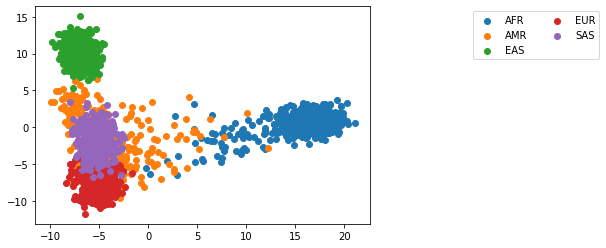

In [80]:
#color PCA plot according to superpopulation
fig, ax = plt.subplots()
superpopulation = pca_output_df.groupby("super_pop")
for name, group in superpopulation:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
    
plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol = 2)

plt.show()

# Exercise 7

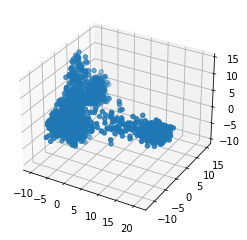

In [119]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs = pca_output_df['PC1'], ys = pca_output_df['PC2'],
          zs = pca_output_df['PC3'])
plt.show()

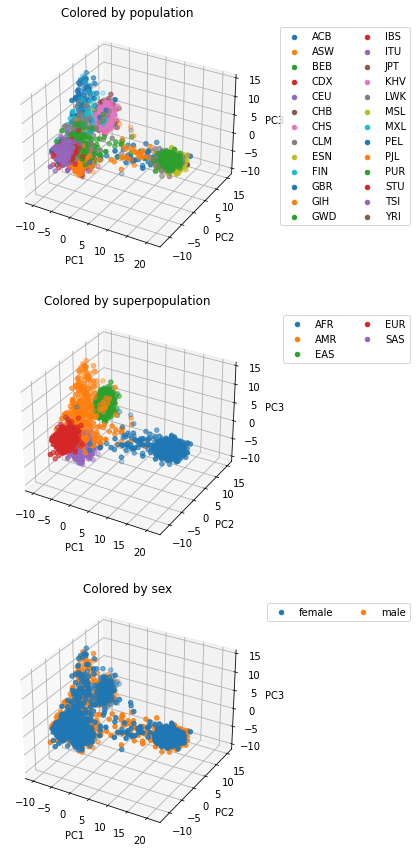

In [139]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,15))

#first subplot
ax = fig.add_subplot(311, projection='3d')

#color PCA by population
population = pca_output_df.groupby("pop")


for name, group in population:
    ax.scatter(xs = group['PC1'], ys = group['PC2'], zs = group['PC3'], label = name)
    ax.legend(bbox_to_anchor = (1.7,1),loc='upper right',ncol = 2)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title('Colored by population')

#second subplot
ax = fig.add_subplot(312, projection='3d')

#color PCA by superpopulation
superpopulation = pca_output_df.groupby("super_pop")

for name, group in superpopulation:
    ax.scatter(xs = group['PC1'], ys = group['PC2'], zs = group['PC3'], label = name)
    ax.legend(bbox_to_anchor = (1.7,1), loc = 'upper right', ncol = 2)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title('Colored by superpopulation')

#third subplot
ax = fig.add_subplot(313, projection='3d')

#color PCA by sex
gender = pca_output_df.groupby("gender")

for name, group in gender:
    ax.scatter(xs = group['PC1'], ys = group['PC2'], zs = group['PC3'], label = name)
    ax.legend(bbox_to_anchor = (1.7,1), loc = 'upper right', ncol = 2)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title('Colored by sex')

plt.show()